In [1]:
from IPython.display import HTML
HTML('''
<script>
code_show=false;
function code_toggle(){
    if(code_show){$('.prompt, .input, .output_stderr, .output_error').hide();}
    else{$('.input, .prompt, .output_stderr, .output_error').show();}
    code_show=!code_show;
}
function initialize(){
    document.body.style.fontFamily='Palatino';
    var output=$('.output_subarea.output_text.output_stream.output_stdout');
    $.merge(output,$('.output_subarea.output_text.output_result'));
    for(var i=0;i<output.length;i++)for(var j=0;j<output[i].children.length;j++)
        output[i].children[j].style.fontFamily='Palatino';
    code_toggle();
}
$(document).ready(initialize);
</script>
Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.
''')

### 7.2.7 Exercices
#### Exercice 4.
Soit la fonction de boucle ouverte d'un processus d'asservissement de position: $$G(p)={\frac {1}{(1+0,1p)(1+0,01p)}}$$

On demande de déterminer *graphiquement* le correcteur PI dont le but est d'annuler l'erreur de position tout en assurant une marge de phase de 45°.

##### Solution:

In [2]:
from IPython.display import display, Markdown

from control.matlab import *  # Python Control Systems Toolbox (compatibility with MATLAB)
import numpy as np              # Library to manipulate array and matrix
import matplotlib.pyplot as plt # Library to create figures and plots
import math # Library to be able to do some mathematical operations
import ReguLabFct as rlf # Library useful for the laboratory of regulation of Gramme

In [3]:
# Fonction de transfert en boucle ouverte
G1 = tf(1, [0.1, 1])
G2 = tf(1, [0.01, 1])
G = G1*G2  # G de l'énoncé 

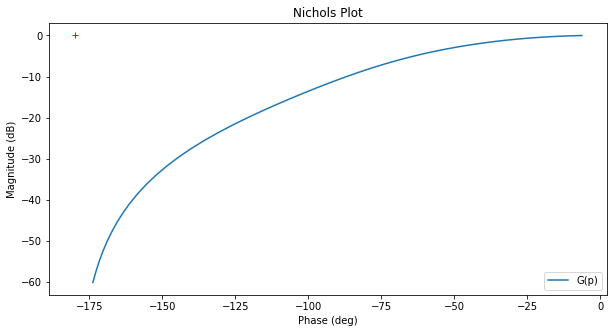

In [4]:
fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")

Gain à -135° = -25.305128094489127 dB
Fréquence à -135° = 118.41516943588255 rad/sec


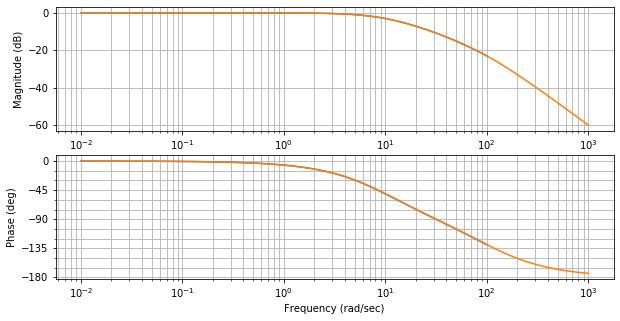

In [5]:
MP = 45
fig = plt.figure("Bode",figsize=(10,5))
ax = fig.subplots()
mag, w = rlf.getValues(G, -180+MP, printValue=True, NameOfFigure="Bode")

In [6]:
Kp = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure

display(Markdown(rf"Sur le tracé du système en BO (trait plein), on relève que pour une phase de {MP}°, le gain vaut : {20*np.log10(mag):.1f} dB."))
display(Markdown(rf"Nous allons donc choisir un correcteur de gain $K_P$={Kp:.2f} qui permettra de relever la courbe de {-20*np.log10(mag):.1f} dB afin d’assurer une marge de phase de {MP}°."))

Sur le tracé du système en BO (trait plein), on relève que pour une phase de 45°, le gain vaut : -25.3 dB.

Nous allons donc choisir un correcteur de gain $K_P$=18.42 qui permettra de relever la courbe de 25.3 dB afin d’assurer une marge de phase de 45°.

Marge de phase du système corrigé = 45.0°.


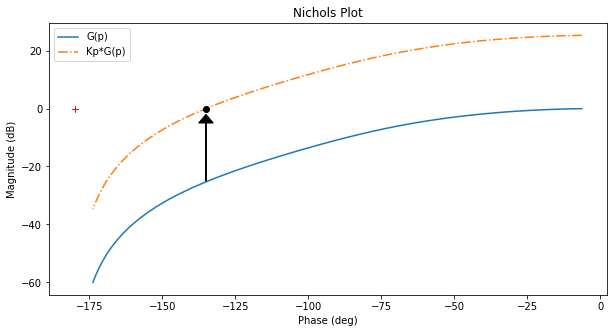

In [7]:
fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Kp*G, labels=['Kp*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
ax.plot(-180+MP, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib
ax.arrow(-180+MP, 20*np.log10(mag), 0, -20*np.log10(mag)-2, 
         length_includes_head=True, width=.05, head_width=5, head_length=3, color='k');

gm, pm, wg, wp = margin(Kp*G) # Extract the gain margin (Gm) and the phase margin (Pm)
print("Marge de phase du système corrigé = {:.1f}°.".format(pm))

In [8]:
display(Markdown(r"Sur la courbe $K_P*G(p)$ (trait mixe), on va positionner le terme I de manière à ce qu’il agisse sur les basses fréquences (effet en régime établi) sans modifier les pulsations proches du point critique càd $\omega_{critique}$="rf"{w:.2f} rad/s."))

Sur la courbe $K_P*G(p)$ (trait mixe), on va positionner le terme I de manière à ce qu’il agisse sur les basses fréquences (effet en régime établi) sans modifier les pulsations proches du point critique càd $\omega_{critique}$=118.42 rad/s.

In [9]:
tI = 10/w
display(Markdown(r"Le terme I doit être positionné de manière à ce que $\omega_{critique}>10\frac{1}{\tau_{I}}$, soit $\tau_I$>"rf"{tI:.4f}s."))

Le terme I doit être positionné de manière à ce que $\omega_{critique}>10\frac{1}{\tau_{I}}$, soit $\tau_I$>0.0844s.

In [10]:
Corr = Kp*tf([tI, 1],[tI, 0])

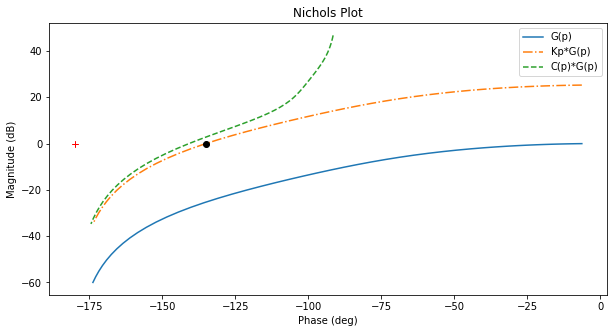

In [11]:
fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Kp*G, labels=['Kp*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Corr*G, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '--')
ax.plot(-180+MP, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib

En trait interrompu: le système ainsi corrigé. Constatons que nos précautions se basent sur l’étude asymptotique du correcteur PI qui pour –135° présente un module d’environ 3 dB, nous pourrions donc

###### Soit redescendre la courbe de

In [12]:
mag_PI, w_PI = rlf.getValues(Corr*G, -180+MP, printValue = False)
plt.close()
Kp2 = 1/mag_PI*Kp
display(Markdown(rf"{20*np.log10(mag_PI):.1f} dB avec un gain de {1/mag_PI:.3f}, ce qui revient à adapter le correcteur $K_P$= {1/mag_PI:.3f}*{Kp:.2f} = {Kp2:.2f}."))

2.8 dB avec un gain de 0.724, ce qui revient à adapter le correcteur $K_P$= 0.724*18.42 = 13.34.

In [13]:
display(Markdown(r"""L’équation du correcteur est donc : $C(p)=K_P\frac{1+\tau_Ip}{\tau_Ip}$ 

dont les paramètres sont: $K_P$="""rf"{Kp2:.2f} et $\tau_I$={tI:.4f} secondes."))

display(Markdown("Soit, C(p) ="))
Corr2 = Kp2*tf([tI, 1],[tI, 0])
print(Corr2)

L’équation du correcteur est donc : $C(p)=K_P\frac{1+\tau_Ip}{\tau_Ip}$ 

dont les paramètres sont: $K_P$=13.34 et $\tau_I$=0.0844 secondes.

Soit, C(p) =


1.126 s + 13.34
---------------
   0.08445 s



<div class="alert alert-block alert-danger">
<b>Remarque:</b> le 'p' de la formule est noté 's' dans la notation anglophone et donc dans les résultats calculés!
</div>

Ainsi corrigé, les performances du système au niveau de la réponse indicielle se chiffrent:

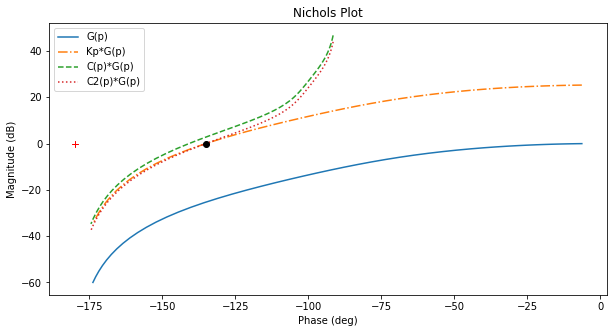

In [14]:
fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Kp*G, labels=['Kp*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Corr*G, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '--')
rlf.nichols(Corr2*G, labels=['C2(p)*G(p)'], NameOfFigure = "Nichols", linestyle = ':')
ax.plot(-180+MP, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib


Système non corrigé
-------------------
Marge de phase = inf°
DC gain = 0.499 => Erreur de position = 50.1%
Rise Time = 0.101 s
Peak amplitude = 0.499
Overshoot = 0.0%
Settling Time = 0.143 s


Système corrigé
---------------
Marge de phase = 45.000°
DC gain = 1.000 => Erreur de position = -0.0%
Rise Time = 0.013 s
Peak amplitude = 1.240
Overshoot = 24.0%
Settling Time = 0.046 s



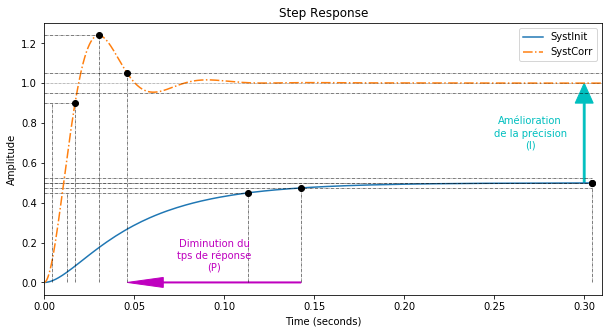

In [15]:
fig = plt.figure("Step Response",figsize=(10,5))
ax = fig.subplots()

# Système non corrigé
# -------------------

Gbf = feedback(G,1)
info = rlf.info()
rlf.stepWithInfo(Gbf, info, NameOfFigure="Step Response", sysName='SystInit') # Renvoie toutes les infos du step

ep = (1-info.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème non corrigé")
print("-------------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info.DCGain:.3f} => Erreur de position = {ep:.1f}%
Rise Time = {info.RiseTime:.3f} s
Peak amplitude = {info.Peak:.3f}
Overshoot = {info.Overshoot:.3}%
Settling Time = {info.SettlingTime:.3f} s
""")

# Système corrigé
# ---------------
Gbf_PI = feedback(Corr2*G,1)
info_PI = rlf.info()
rlf.stepWithInfo(Gbf_PI, info_PI, NameOfFigure="Step Response", sysName='SystCorr', linestyle='-.') # Renvoie toutes les infos du step

ep_PI = (1-info_PI.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(Corr2*G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème corrigé")
print("---------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info_PI.DCGain:.3f} => Erreur de position = {ep_PI:.1f}%
Rise Time = {info_PI.RiseTime:.3f} s
Peak amplitude = {info_PI.Peak:.3f}
Overshoot = {info_PI.Overshoot:.3}%
Settling Time = {info_PI.SettlingTime:.3f} s
""")

# Ajout de détails
ax.set_xlim(0, 0.31); # Zoom sur la région d'intérêt

ax.arrow(0.3, info.DCGain, 0, (info_PI.DCGain-info.DCGain), 
         length_includes_head=True, width=.001, head_width=0.01, head_length=0.1, color='c');

ax.text(0.27, info.DCGain+(info_PI.DCGain-info.DCGain)/2, 'Amélioration\nde la précision\n(I)', horizontalalignment = 'center', verticalalignment='center', color='c');

ax.arrow(info.SettlingTime, 0, -(info.SettlingTime-info_PI.SettlingTime), 0, 
         length_includes_head=True, width=.005, head_width=0.05, head_length=0.02, color='m');

ax.text(info.SettlingTime-(info.SettlingTime-info_PI.SettlingTime)/2, 0.05, 'Diminution du\ntps de réponse\n(P)', verticalalignment='bottom', 
        horizontalalignment='center', color='m');

###### Soit adapter $\tau_I$ : 

In [16]:
tI = 100/w
display(Markdown(r"""
Puisque à 120 rad/s, l’effet de 3 dB est trop marqué, nous pouvons décaler l’effet de I vers les basses fréquences :
$\omega_{critique}>100\frac{1}{\tau_I}$ soit $\tau_I >$"""rf' {tI:.4f}s.'))

display(Markdown(r"Donc $C(p)=K_P\frac{1+\tau_Ip}{\tau_Ip}$ avec: $K_P$="rf'{Kp:.2f} et $\tau_I$={tI:.4f}'))

Corr3 = Kp*tf([tI, 1],[tI, 0])
display(Markdown("Soit, C(p) ="))
print(Corr3)


Puisque à 120 rad/s, l’effet de 3 dB est trop marqué, nous pouvons décaler l’effet de I vers les basses fréquences :
$\omega_{critique}>100\frac{1}{\tau_I}$ soit $\tau_I >$ 0.8445s.

Donc $C(p)=K_P\frac{1+\tau_Ip}{\tau_Ip}$ avec: $K_P$=18.42 et $\tau_I$=0.8445

Soit, C(p) =


15.55 s + 18.42
---------------
    0.8445 s



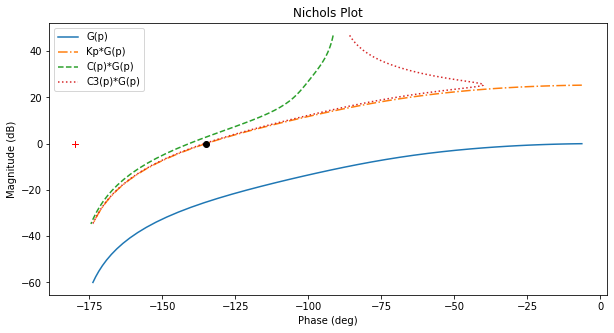

In [17]:
fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Kp*G, labels=['Kp*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Corr*G, labels=['C(p)*G(p)'], NameOfFigure = "Nichols", linestyle = '--')
rlf.nichols(Corr3*G, labels=['C3(p)*G(p)'], NameOfFigure = "Nichols", linestyle = ':')
ax.plot(-180+MP, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib

Si on compare les réponses temporelles des systèmes ainsi corrigés :


Système corrigé via Kp
----------------------
Marge de phase = 45.000°
DC gain = 1.000 => Erreur de position = -0.0%
Rise Time = 0.013 s
Peak amplitude = 1.240
Overshoot = 24.0%
Settling Time = 0.046 s


Système corrigé via tI
----------------------
Marge de phase = 44.434°
DC gain = 1.000 => Erreur de position = 0.0%
Rise Time = 0.011 s
Peak amplitude = 1.206
Overshoot = 20.6%
Settling Time = 0.063 s



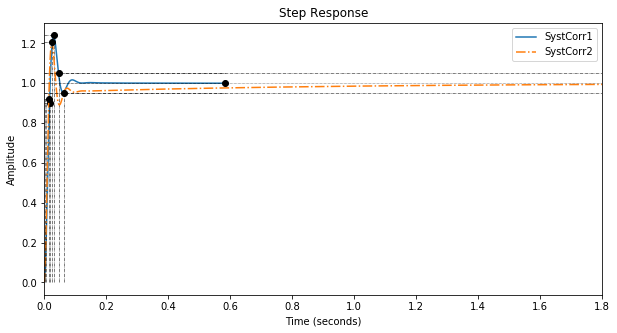

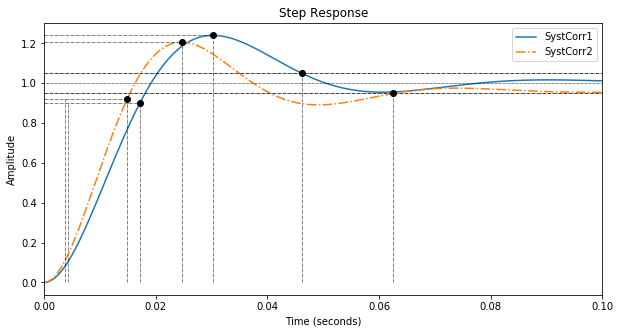

In [18]:
fig = plt.figure("Step Response",figsize=(10,5))
ax1 = plt.subplot()

# Système corrigé via Kp
# ----------------------

Gbf_PI = feedback(Corr2*G,1)
info_PI = rlf.info()
rlf.stepWithInfo(Gbf_PI, info_PI, NameOfFigure="Step Response", sysName='SystCorr1', linestyle='-') # Renvoie toutes les infos du step

ep_PI = (1-info_PI.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(Corr2*G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème corrigé via Kp")
print("----------------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info_PI.DCGain:.3f} => Erreur de position = {ep_PI:.1f}%
Rise Time = {info_PI.RiseTime:.3f} s
Peak amplitude = {info_PI.Peak:.3f}
Overshoot = {info_PI.Overshoot:.3}%
Settling Time = {info_PI.SettlingTime:.3f} s
""")

# Système corrigé via tI
# ----------------------
Gbf_PI2 = feedback(Corr3*G,1)
info_PI2 = rlf.info()
rlf.stepWithInfo(Gbf_PI2, info_PI2, NameOfFigure="Step Response", sysName='SystCorr2', linestyle='-.') # Renvoie toutes les infos du step

ep_PI2 = (1-info_PI2.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(Corr3*G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème corrigé via tI")
print("----------------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info_PI2.DCGain:.3f} => Erreur de position = {ep_PI2:.1f}%
Rise Time = {info_PI2.RiseTime:.3f} s
Peak amplitude = {info_PI2.Peak:.3f}
Overshoot = {info_PI2.Overshoot:.3}%
Settling Time = {info_PI2.SettlingTime:.3f} s
""")

ax1.set_xlim(0, 1.8); # Zoom sur la région d'intérêt

fig = plt.figure("Zoomed Step Response",figsize=(10,5))
ax2 = plt.subplot()
rlf.stepWithInfo(Gbf_PI, info_PI, NameOfFigure="Zoomed Step Response", sysName='SystCorr1', linestyle='-') # Renvoie toutes les infos du step
rlf.stepWithInfo(Gbf_PI2, info_PI2, NameOfFigure="Zoomed Step Response", sysName='SystCorr2', linestyle='-.') # Renvoie toutes les infos du step
ax2.set_xlim(0, 0.1); # Zoom sur la région d'intérêt

On constate que la deuxième solution permet un temps de montée plus court et un dépassement moins important mais au détriment du temps de réponse (voir figure du dessus pour estimer le temps nécessaire pour réellement annuler l’erreur de position …).

#### Exercice 5.
Soit la fonction de boucle ouverte d'un processus d'asservissement de position: $$G(p)={\frac {4}{(1+0,5p)(1+4p)(0,1p+1)}}$$

On demande de déterminer le correcteur PI dont le but est d'annuler l'erreur en régime permanent lorsque le système est soumis à une entrée de type échelon tout en assurant une réponse indicielle dont le temps de réponse à 5% reste inférieur à 5s.

##### Solution:

In [19]:
# Fonction de transfert en boucle ouverte
K = 4
G1 = tf(1, [0.5, 1])
G2 = tf(1, [4, 1])
G3 = tf(1, [0.1, 1])
G = K*G1*G2*G3  # G de l'énoncé 

Marge de phase du système initial = 77.2°.


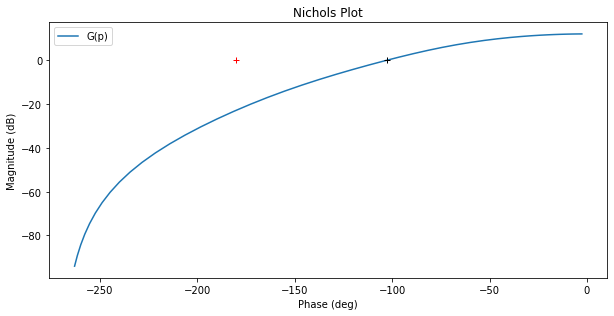

In [20]:
fig = plt.figure("Nichols",figsize=(10,4.7))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")

gm, pm, wg, wp = margin(G) # Extract the gain margin (Gm) and the phase margin (Pm)
print("Marge de phase du système initial = {:.1f}°.".format(pm))

ax.plot(-180+pm, 0,'k+'); # ; pour supprimer les lignes de sortie matplotlib

Le tracé du système en BO (trait plein) présente déjà une marge de phase acceptable, nous allons donc exploiter la méthode de compensation du pole dominant (celui qui introduit la plus grande constante de temps) : soit $\tau_I=\tau_{max}=4s$ pour le terme I.

Marge de phase du système corrigé = 60.4°.


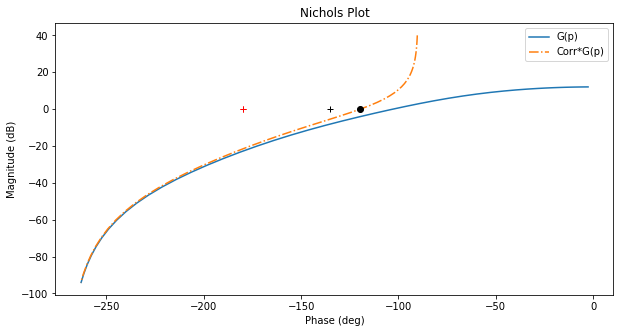

In [21]:
Corr = tf([4, 1], [4, 0])

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr*G, labels=['Corr*G(p)'], NameOfFigure = "Nichols", linestyle = '-.')

gm, pm, wg, wp = margin(Corr*G) # Extract the gain margin (Gm) and the phase margin (Pm)
print("Marge de phase du système corrigé = {:.1f}°.".format(pm))

ax.plot(-180+MP, 0,'k+'); # ; pour supprimer les lignes de sortie matplotlib
ax.plot(-180+pm, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib

Du tracé de $\frac{(1+4p)}{4p}*G(p)=\frac{1}{p(1+0,5p)(1+0,1p)}$ (trait mixe), on déduit la valeur du terme P :

Gain à -135° = -5.4277183903073665 dB
Fréquence à -135° = 1.4839427342120108 rad/sec


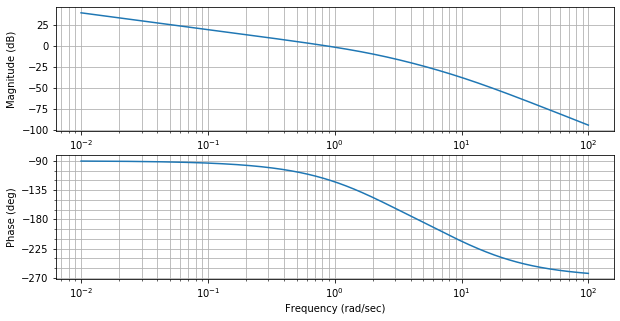

In [22]:
MP = 45
fig = plt.figure("Bode",figsize=(10,5))
ax = fig.subplots()
mag, w = rlf.getValues(Corr*G, -180+MP, printValue=True, NameOfFigure="Bode")

In [23]:
Kp = 1/mag  # Donne directement la valeur de l'amplitude => Pas besoin de la convertir à partir d'une valeur en dB + Kp va à l'inverse de ce qu'on mesure

display(Markdown(rf"Pour une phase de {MP}°, le gain vaut : {20*np.log10(mag):.1f} dB, soit $K_P$={Kp:.2f} qui permet de relever la courbe de {-20*np.log10(mag):.1f} dB afin d’assurer une marge de phase de {MP}°."))

Pour une phase de 45°, le gain vaut : -5.4 dB, soit $K_P$=1.87 qui permet de relever la courbe de 5.4 dB afin d’assurer une marge de phase de 45°.

En trait interrompu: le système ainsi corrigé.

Marge de phase du système corrigé = 45.0°.


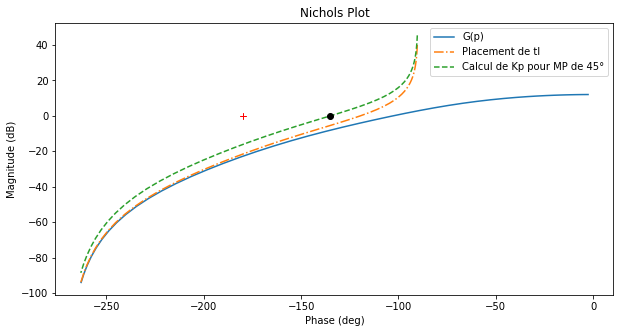

In [24]:
Corr = tf([4, 1], [4, 0])

fig = plt.figure("Nichols",figsize=(10,5))
ax = fig.subplots()
rlf.nichols(G, labels=['G(p)'], NameOfFigure = "Nichols")
rlf.nichols(Corr*G, labels=['Placement de tI'], NameOfFigure = "Nichols", linestyle = '-.')
rlf.nichols(Kp*Corr*G, labels=['Calcul de Kp pour MP de 45°'], NameOfFigure = "Nichols", linestyle = '--')

gm, pm, wg, wp = margin(Kp*Corr*G) # Extract the gain margin (Gm) and the phase margin (Pm)
print("Marge de phase du système corrigé = {:.1f}°.".format(pm))

ax.plot(-180+MP, 0,'k+'); # ; pour supprimer les lignes de sortie matplotlib
ax.plot(-180+pm, 0,'ko'); # ; pour supprimer les lignes de sortie matplotlib

Ainsi corrigé, les performances du système au niveau de la réponse indicielle se chiffrent:


Système non corrigé
-------------------
Marge de phase = 77.206°
DC gain = 0.800 => Erreur de position = 20.0%
Rise Time = 1.273 s
Peak amplitude = 0.857
Overshoot = 7.13%
Settling Time = 3.352 s


Système corrigé
---------------
Marge de phase = 44.985°
DC gain = 1.000 => Erreur de position = 0.0%
Rise Time = 0.806 s
Peak amplitude = 1.233
Overshoot = 23.3%
Settling Time = 4.004 s



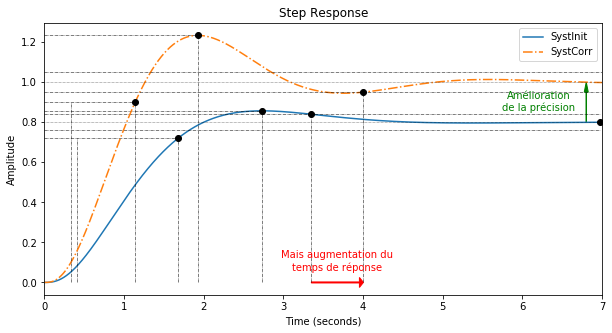

In [25]:
fig = plt.figure("Step Response",figsize=(10,5))
ax = fig.subplots()

# Système non corrigé
# -------------------

Gbf = feedback(G,1)
info = rlf.info()
rlf.stepWithInfo(Gbf, info, NameOfFigure="Step Response", sysName='SystInit') # Renvoie toutes les infos du step

ep = (1-info.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème non corrigé")
print("-------------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info.DCGain:.3f} => Erreur de position = {ep:.1f}%
Rise Time = {info.RiseTime:.3f} s
Peak amplitude = {info.Peak:.3f}
Overshoot = {info.Overshoot:.3}%
Settling Time = {info.SettlingTime:.3f} s
""")

# Système corrigé
# ---------------
Gbf_PI = feedback(Kp*Corr*G,1)
info_PI = rlf.info()
rlf.stepWithInfo(Gbf_PI, info_PI, NameOfFigure="Step Response", sysName='SystCorr', linestyle='-.') # Renvoie toutes les infos du step

ep_PI = (1-info_PI.DCGain)*100 # Erreur de position

gm, pm, wg, wp = margin(Kp*Corr*G) # Extract the gain margin (Gm) and the phase margin (Pm)

print("\nSystème corrigé")
print("---------------")
print(f"""Marge de phase = {pm:.3f}°
DC gain = {info_PI.DCGain:.3f} => Erreur de position = {ep_PI:.1f}%
Rise Time = {info_PI.RiseTime:.3f} s
Peak amplitude = {info_PI.Peak:.3f}
Overshoot = {info_PI.Overshoot:.3}%
Settling Time = {info_PI.SettlingTime:.3f} s
""")

# Ajout de détails
ax.set_xlim(0, 7); # Zoom sur la région d'intérêt

ax.arrow(6.8, info.DCGain, 0, (info_PI.DCGain-info.DCGain), 
         length_includes_head=True, width=.005, head_width=0.05, head_length=0.05, color='g');

ax.text(6.2, info.DCGain+(info_PI.DCGain-info.DCGain)/2, 'Amélioration\nde la précision', horizontalalignment = 'center', verticalalignment='center', color='g');

ax.arrow(info.SettlingTime, 0, -(info.SettlingTime-info_PI.SettlingTime), 0, 
         length_includes_head=True, width=.005, head_width=0.05, head_length=0.05, color='r');

ax.text(info.SettlingTime-(info.SettlingTime-info_PI.SettlingTime)/2, 0.05, 'Mais augmentation du\ntemps de réponse', verticalalignment='bottom', 
        horizontalalignment='center', color='r');

In [26]:
HTML('''<script>initialize();</script>Click <a href="javascript:code_toggle()">here</a> to show/hide codes in this notebook.''')